# Exploratory Data Analysis of the preprocessed Data


In [1]:
# Setup
import pandas as pd
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import string
from wordcloud import WordCloud

# Set random seeds for reproducibility
seed = 13
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# load data 
data = pd.read_csv("../data/final_data.csv")

if "Unnamed: 0" in data.columns:
    data = data.drop("Unnamed: 0", axis=1)

### Overview

In [2]:
# Getting to know the data frame
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36117 entries, 0 to 36116
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   speech_text         36117 non-null  object
 1   legislative_period  36117 non-null  int64 
 2   protocol_nr         36117 non-null  int64 
 3   agenda_item_number  36117 non-null  int64 
 4   party               36117 non-null  object
 5   agenda_item_title   34514 non-null  object
 6   date                34514 non-null  object
 7   full_name           36117 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.2+ MB


speech_text  legislative_period  \
count                                               36117        36117.000000   
unique                                              36117                 NaN   
top     Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...                 NaN   
freq                                                    1                 NaN   
mean                                                  NaN           19.470499   
std                                                   NaN            0.499136   
min                                                   NaN           19.000000   
25%                                                   NaN           19.000000   
50%                                                   NaN           19.000000   
75%                                                   NaN           20.000000   
max                                                   NaN           20.000000   

         protocol_nr  agenda_item_number    party agenda_item_title  \
count   36117.000000        36117.000000    36117             34514   
unique           NaN                 NaN        6              2778   
top              NaN                 NaN  CDU/CSU   Auswärtiges Amt   
freq             NaN                 NaN     9676               275   
mean      117.958274            6.844810      NaN               NaN   
std        64.095874            5.271595      NaN               NaN   
min         1.000000            1.000000      NaN               NaN   
25%        63.000000            3.000000      NaN               NaN   
50%       117.000000            5.000000      NaN               NaN   
75%       172.000000           10.000000      NaN               NaN   
max       239.000000           35.000000      NaN               NaN   

              date       full_name  
count        34514           36117  
unique         428            1018  
top     2023-10-12  Volker Ullrich  
freq           182             257  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

In [3]:
# computing basic text statistics


# preparing extra columns:
# editing the speeches in new column: all to lower case, removing all punctuation
data["text_edit"] = data["speech_text"].str.lower().str.translate(str.maketrans('', '', string.punctuation))
# adding column with tokenized speeches
data["tokenized_text"] = data["text_edit"].str.split()
# new column with length of speeches
data["speech_length"] = data["tokenized_text"].str.len()

# getting all speeches into one shared list to investigate words
all_vocab = " ".join(data["text_edit"].astype(str))
all_words = all_vocab.split()
# getting number of all words
vocab_size = len(set(all_words))
# getting most frequent words
word_counts = Counter(all_words)
most_freq = word_counts.most_common(5)

# getting mean and median of speech length
mean_speech_length = np.mean(data["speech_length"])
median_speech_length = np.median(data["speech_length"])

# getting distributions of target variables
pct_parties = round(data["party"].value_counts(normalize = True) * 100, 1)
pct_parties = pct_parties.to_dict()

# printing all investigated stats
print("Looking at speeches:")
print(f"   Number of speeches: {len(data)}")
print(f"   Vocabulary size: {vocab_size}")
print(f"   Average speech length (mean): {mean_speech_length}")
print(f"   Average speech length (median): {median_speech_length}")
print(f"   Most commonly used words: \n   {most_freq}")
print("Output variable parties:")
print(f"   Speaker parties: \n   {data['party'].value_counts().to_dict()}")
print(f"   Speaker parties in pct: \n   {pct_parties}")


Looking at speeches:
   Number of speeches: 36117
   Vocabulary size: 319779
   Average speech length (mean): 633.6336628180635
   Average speech length (median): 607.0
   Most commonly used words: 
   [('die', 786840), ('und', 688879), ('der', 576292), ('das', 439263), ('wir', 418783)]
Output variable parties:
   Speaker parties: 
   {'CDU/CSU': 9676, 'SPD': 8032, 'GRÜNE': 5067, 'AfD': 5041, 'FDP': 4683, 'LINKE': 3618}
   Speaker parties in pct: 
   {'CDU/CSU': 26.8, 'SPD': 22.2, 'GRÜNE': 14.0, 'AfD': 14.0, 'FDP': 13.0, 'LINKE': 10.0}


C:\Users\Estelle\AppData\Local\Temp\ipykernel_27992\1758983553.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=coloumn, order = order, palette=party_colors)


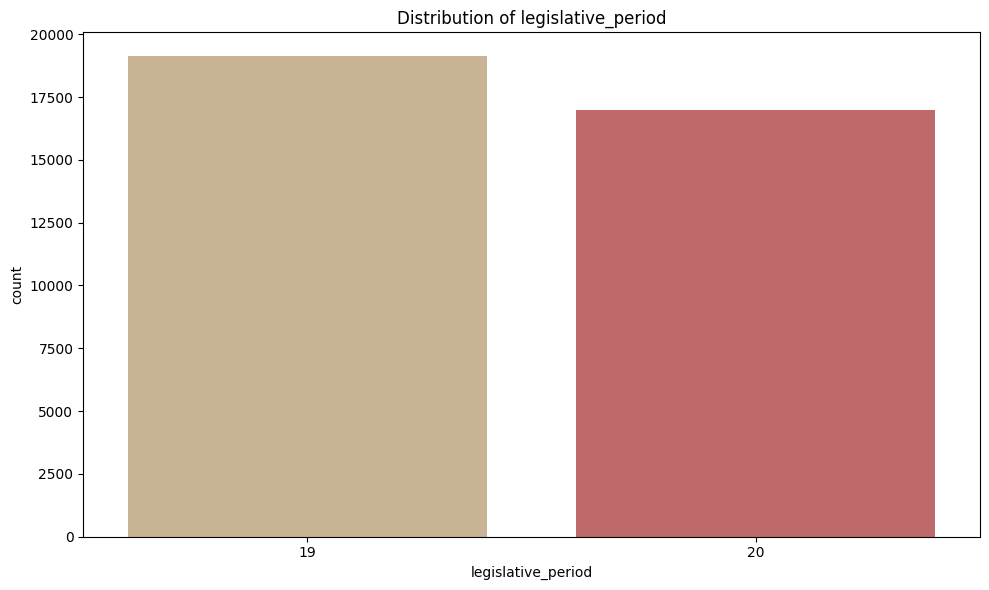

C:\Users\Estelle\AppData\Local\Temp\ipykernel_27992\1758983553.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=coloumn, order = order, palette=party_colors)


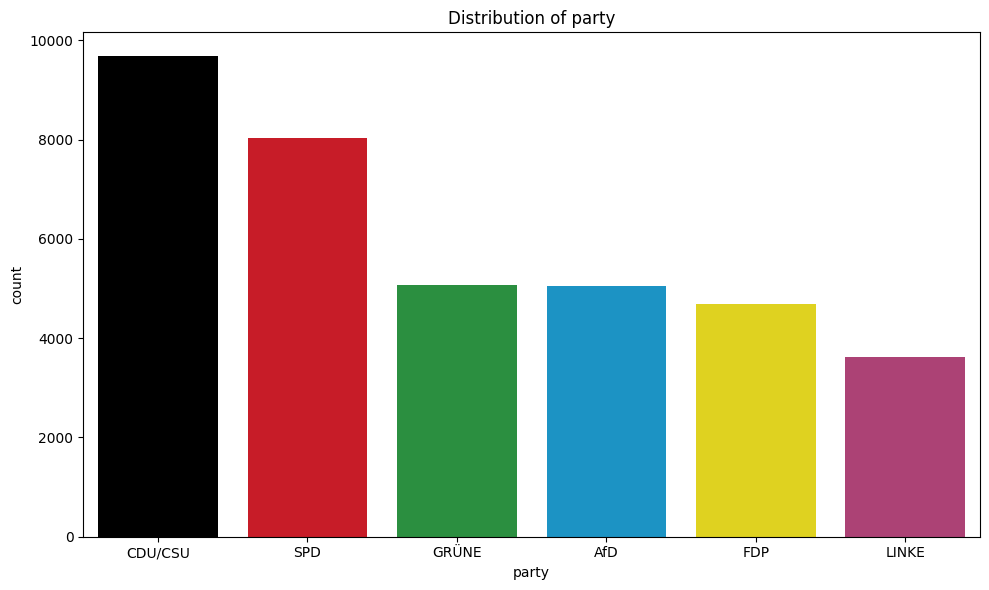

In [5]:
# Visualising features in barplots where information is sensical, to get overview of columns
party_colors = {
    'CDU/CSU': '#000000',              # Black (Schwarz)
    'SPD': '#e3000f',                  # Red (Rot)
    'AfD': '#009ee0',                  # Blue (Blau)
    'GRÜNE': '#1aa036',  # Green (Grün)
    'FDP': '#ffed00',                  # Yellow (Gelb)
    'LINKE': '#be3075',             # Magenta/Pinkish Red

    '19' : 'tan',
    '20' : 'indianred'
}

# subsetting columns that can be interesting
features_to_plot = ['legislative_period', 'party']

# visualising
for coloumn in features_to_plot:
    order = data[coloumn].value_counts().index
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=coloumn, order = order, palette=party_colors)
    plt.title(f'Distribution of {coloumn}')
    plt.tight_layout()
    plt.show()





### Investigating the speech length (after preprocessing, only 100-1500 words)
- Quantiles
- divided by parties

In [6]:
# printing Quantiles
print("25% Quantile", data["speech_length"].quantile(0.25))
print("50% Quantile", data["speech_length"].quantile(0.5))
print("75% Quantile", data["speech_length"].quantile(0.75))
print("99% Quantile", data["speech_length"].quantile(0.99))



25% Quantile 480.0
50% Quantile 607.0
75% Quantile 751.0
99% Quantile 1300.0


Text(0.5, 1.0, 'Histogram of Speech Length')

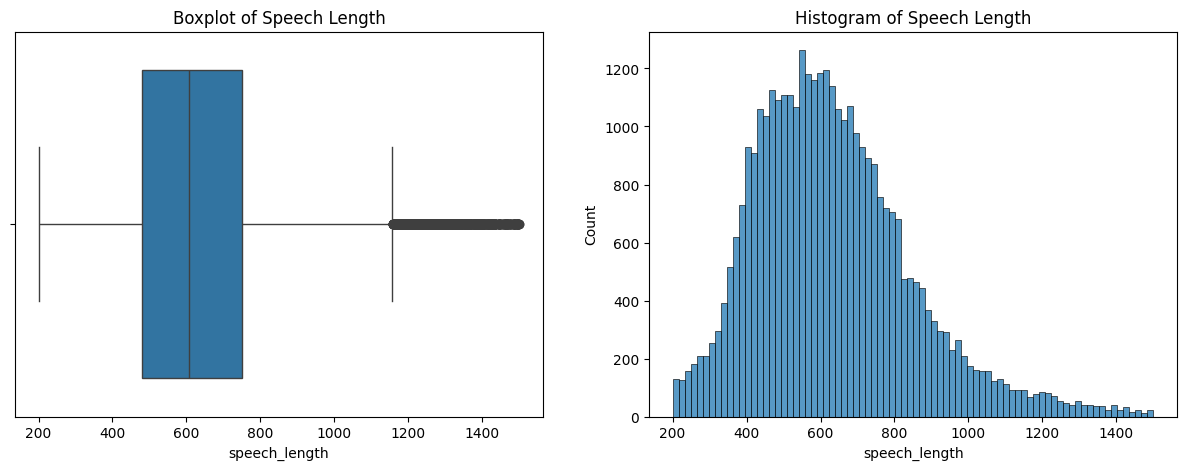

In [7]:
# analysing distribution of speech lengths

# boxplot and histogram
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.boxplot(x = data["speech_length"], ax=axes[0])
axes[0].set_title("Boxplot of Speech Length")

sns.histplot(data["speech_length"], ax=axes[1])
axes[1].set_title("Histogram of Speech Length")

In [8]:
# speech characteristics divided by party
party_stats = (
    data.groupby("party")["speech_length"]
    .agg(
        nr_speeches="count",
        min_speech_length = "min",
        max_word_count = "max",
        mean_word_count="mean"
    )
    .reset_index()
)

# quantiles
party_stats["q25_word_count"] = data.groupby("party")["speech_length"].quantile(0.25).values
party_stats["q50_word_count"] = data.groupby("party")["speech_length"].quantile(0.5).values
party_stats["q75_word_count"] = data.groupby("party")["speech_length"].quantile(0.75).values

# sort
party_stats = party_stats.sort_values(by="nr_speeches", ascending=False)
party_stats


party  nr_speeches  min_speech_length  max_word_count  mean_word_count  \
1  CDU/CSU         9676                201            1500       699.983361   
5      SPD         8032                205            1496       675.975598   
3    GRÜNE         5067                202            1496       604.401618   
0      AfD         5041                201            1497       572.119817   
2      FDP         4683                203            1489       606.438181   
4    LINKE         3618                201            1490       524.036208   

   q25_word_count  q50_word_count  q75_word_count  
1           548.0           676.0           815.0  
5           527.0           647.0           788.0  
3           446.0           567.0           732.0  
0           448.0           553.0           669.0  
2           477.0           584.0           711.0  
4           396.0           484.0           624.0

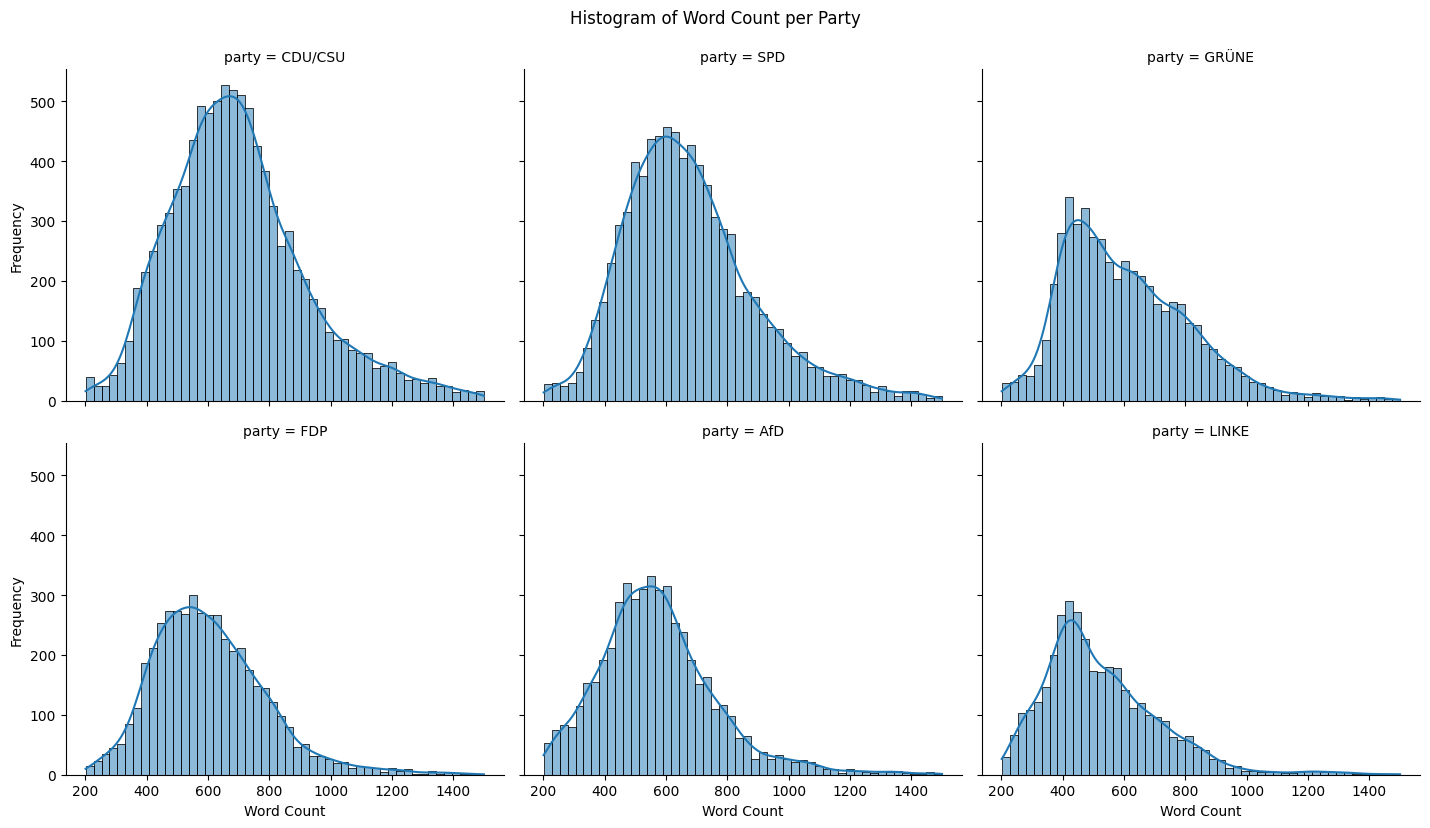

C:\Users\Estelle\AppData\Local\Temp\ipykernel_27992\2921287556.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data_2, x="party", y="mean_word_count", ax=ax, palette=party_colors)


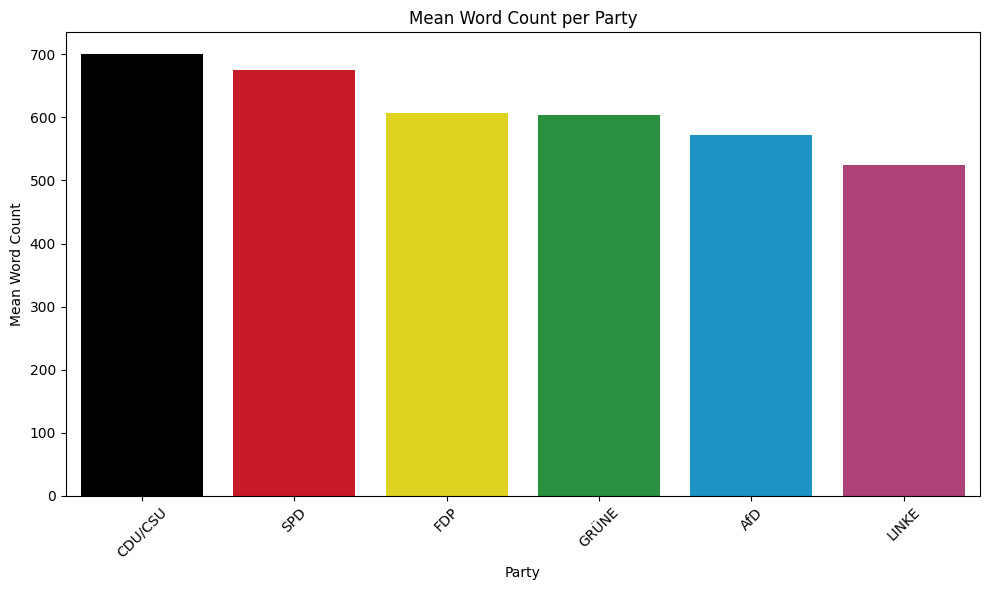

In [9]:
# Visualizing word count of speeches per party 

g = sns.displot(
    data=data,
    x="speech_length",
    col="party",        
    col_wrap=3,            
    bins=50,               
    kde=True,             
    facet_kws={
        'sharex': True,    
        'sharey': True     
    },
    height=4,              
    aspect=1.2             
)

g.set_axis_labels("Word Count", "Frequency")
g.fig.suptitle("Histogram of Word Count per Party", y=1.03)
plt.show()

# Barplot
plot_data_2 = party_stats.sort_values(by="mean_word_count", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.barplot(data=plot_data_2, x="party", y="mean_word_count", ax=ax, palette=party_colors)
ax.set_title("Mean Word Count per Party")
ax.set_xlabel("Party")
ax.set_ylabel("Mean Word Count")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Investigating the number of speeches divided by parties

C:\Users\Estelle\AppData\Local\Temp\ipykernel_27992\700284171.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data_1, x="party", y="nr_speeches", ax=ax, palette=party_colors)


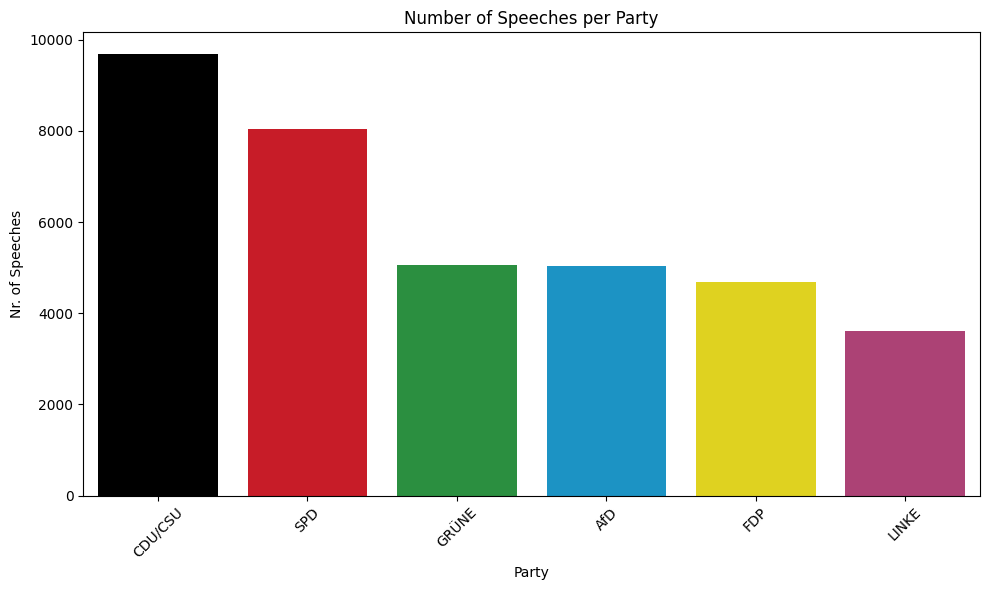

In [10]:
# Visualizing number of speeches per party

# sort
plot_data_1 = party_stats.sort_values(by="nr_speeches", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=plot_data_1, x="party", y="nr_speeches", ax=ax, palette=party_colors)
ax.set_title("Number of Speeches per Party")
ax.set_xlabel("Party")
ax.set_ylabel("Nr. of Speeches")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

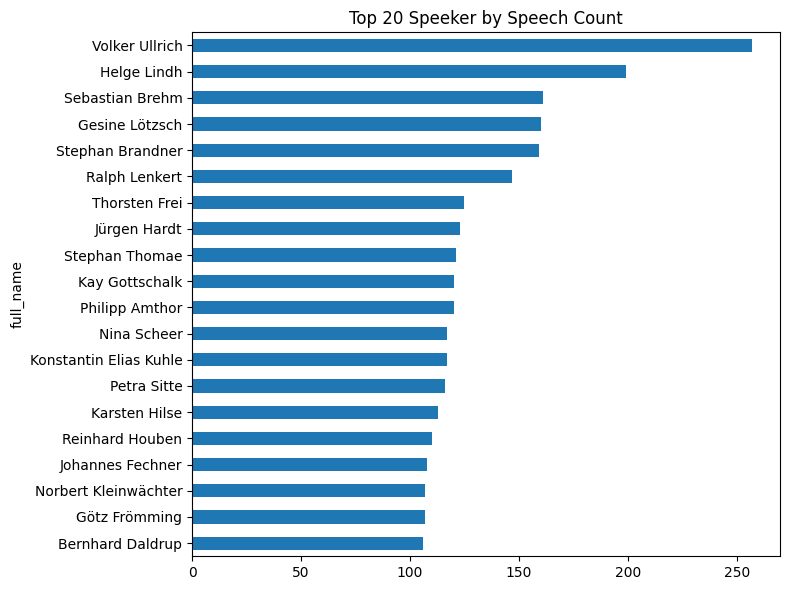

In [11]:
# visualizing top 20 speaker by speech count
top_speakers = data["full_name"].value_counts().head(20)

top_speakers.plot(kind="barh", figsize=(8, 6), title="Top 20 Speeker by Speech Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Investigating speech content
- common words overall
- divided by parties

In [12]:
# preparing stopwords

# importing german stopword list from github
# link: https://github.com/solariz/german_stopwords
with open("german_stopwords_full.txt", "r", encoding="utf-8") as g:
    german_stopwords_full = [line.strip() for line in g if not line.lstrip().startswith(";")]

# maybe list of words to add to stopwords:
more_stopwords = ["damen", "herren", "herr", "kollegen", "kolleginnen", "menschen", "deutschland", "liebe", "präsident", "präsidentin"]

# add list of additional words
german_stopwords_full.extend(more_stopwords)

In [13]:
# add wordcounts
data['clean_full'] = data['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in german_stopwords_full and word.isalpha()])

# Flatten all tokens into a single list
all_tokens = [token for tokens in data['clean_full'] for token in tokens]

# Count word frequencies
word_counts = Counter(all_tokens)

# Get top 10 most common words
top_10 = word_counts.most_common(10)

# Display
for word, count in top_10:
    print(f"{word}: {count}")

euro: 33859
land: 28121
antrag: 26181
bundesregierung: 22457
jahren: 22386
jahr: 21572
prozent: 21407
frage: 20595
thema: 18479
deutschen: 18457


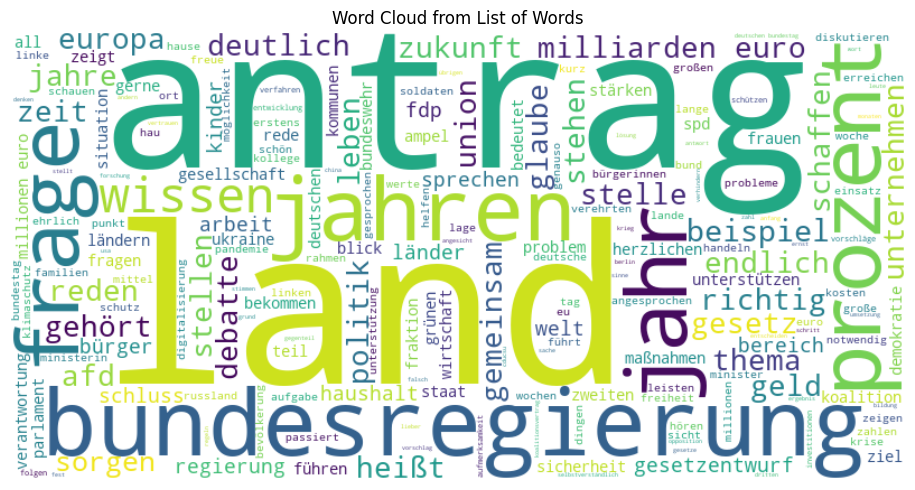

In [14]:
# visualising shared word cloud - speech segmentation

# joining all speech text into a single string
text = ' '.join(all_words)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=german_stopwords_full).generate(text)

# Displaying it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.tight_layout()
plt.show()

In [15]:
# add wordcounts per party

# Group by party and compute top 10 words per party
top_words_per_party = {}

for party, group in data.groupby('party'):
    tokens = [word for tokens in group['clean_full'] for word in tokens]
    word_counter = Counter(tokens)
    top_10 = word_counter.most_common(10)
    top_words_per_party[party] = [f"{word} ({count})" for word, count in top_10]

#  Create df with results to display
result_df = pd.DataFrame(top_words_per_party, index=[f"Top {i+1}" for i in range(10)])
result_df



AfD                 CDU/CSU  \
Top 1              euro (5516)            euro (10050)   
Top 2         deutschen (4227)             land (8372)   
Top 3            antrag (3906)           antrag (7914)   
Top 4              land (3898)            frage (7229)   
Top 5   bundesregierung (3708)            thema (7067)   
Top 6           prozent (3692)             jahr (7017)   
Top 7               afd (3609)          prozent (6661)   
Top 8            bürger (3473)          kollege (6640)   
Top 9         regierung (3226)           jahren (6537)   
Top 10           jahren (2854)  bundesregierung (5842)   

                           FDP                   GRÜNE  \
Top 1              land (3536)             land (3706)   
Top 2            antrag (3439)             euro (3630)   
Top 3              euro (3138)          endlich (3300)   
Top 4   bundesregierung (3133)           jahren (3273)   
Top 5             frage (2820)  bundesregierung (3188)   
Top 6            jahren (2794)           antrag (3142)   
Top 7             union (2679)            union (3082)   
Top 8           kollege (2651)            frage (2835)   
Top 9              jahr (2581)             jahr (2656)   
Top 10            thema (2516)          prozent (2398)   

                         LINKE              SPD  
Top 1              euro (4115)      euro (7410)  
Top 2   bundesregierung (3439)      land (6679)  
Top 3             linke (3127)    antrag (5685)  
Top 4           endlich (2643)    jahren (4845)  
Top 5           prozent (2462)      jahr (4595)  
Top 6            antrag (2095)     frage (4476)  
Top 7            jahren (2083)  beispiel (4432)  
Top 8              jahr (1944)  deutlich (4371)  
Top 9              land (1930)   richtig (4344)  
Top 10       milliarden (1895)    wissen (4286)

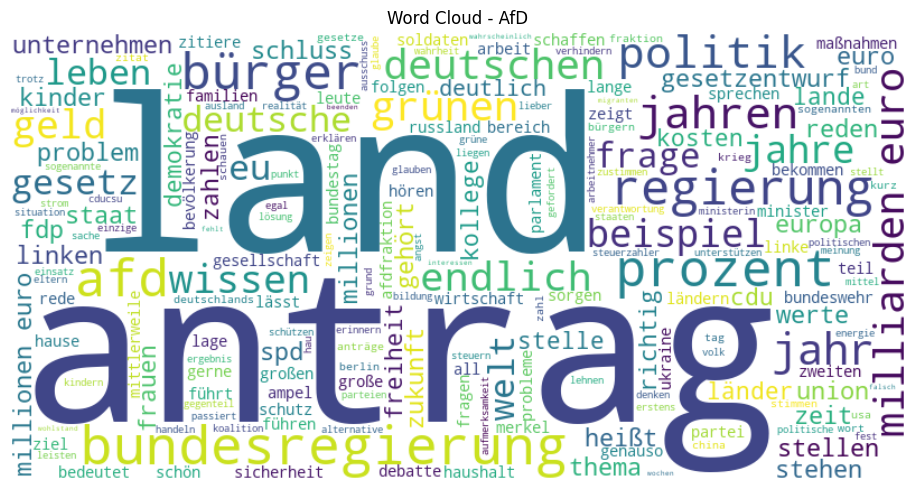

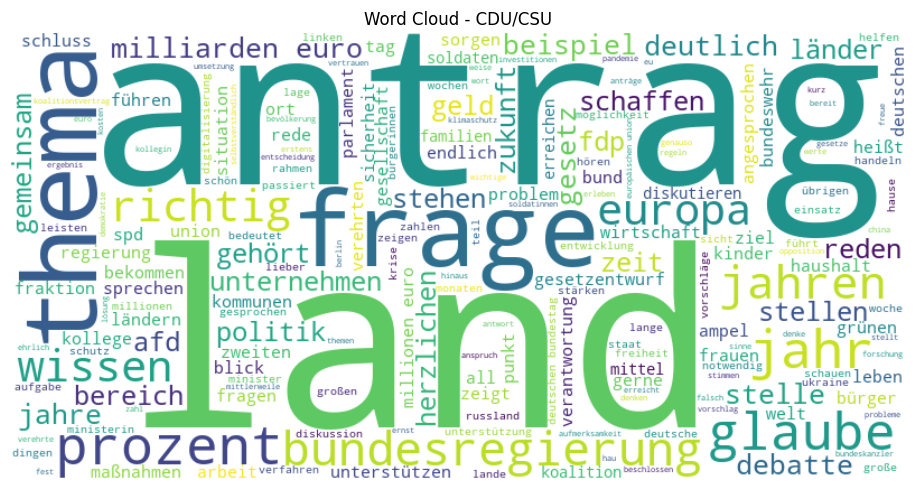

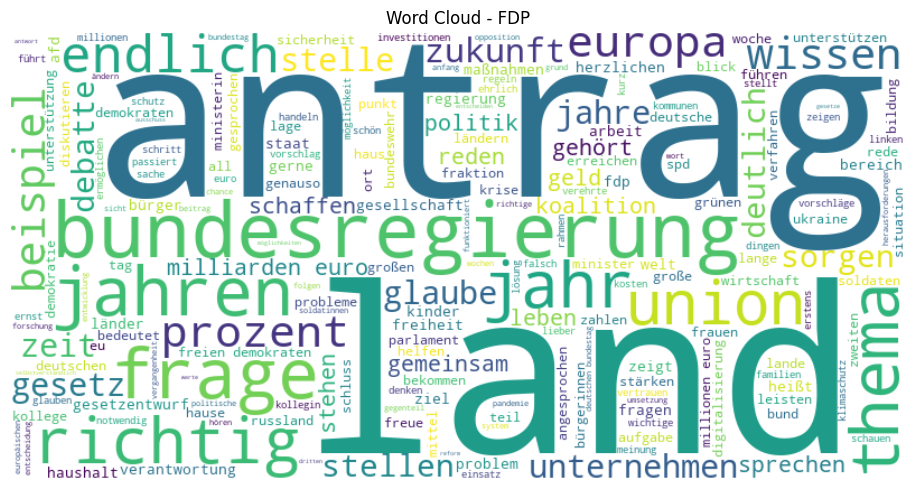

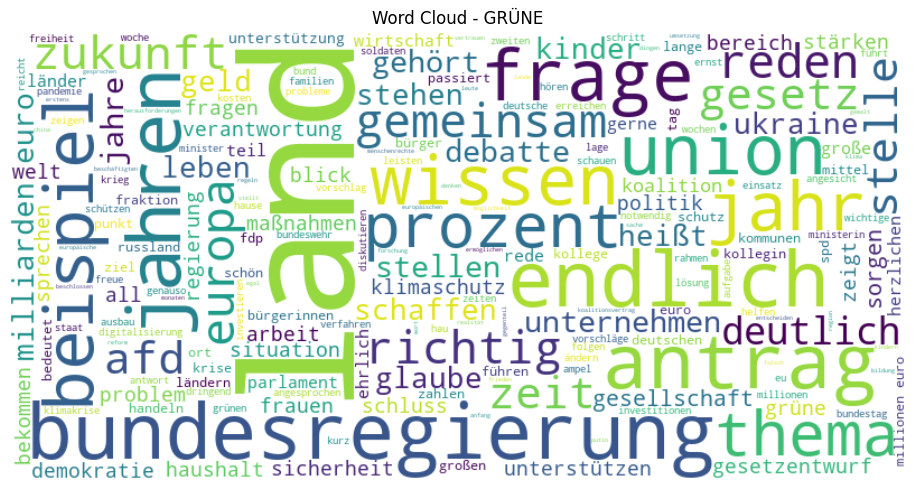

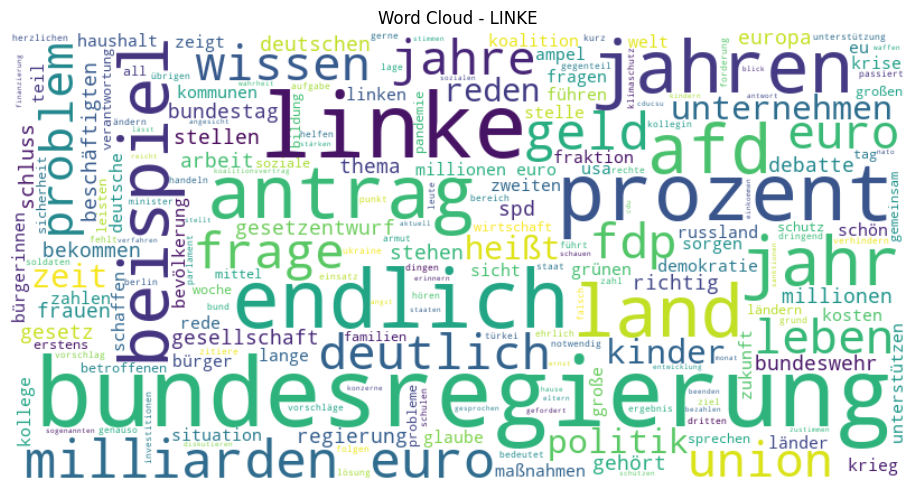

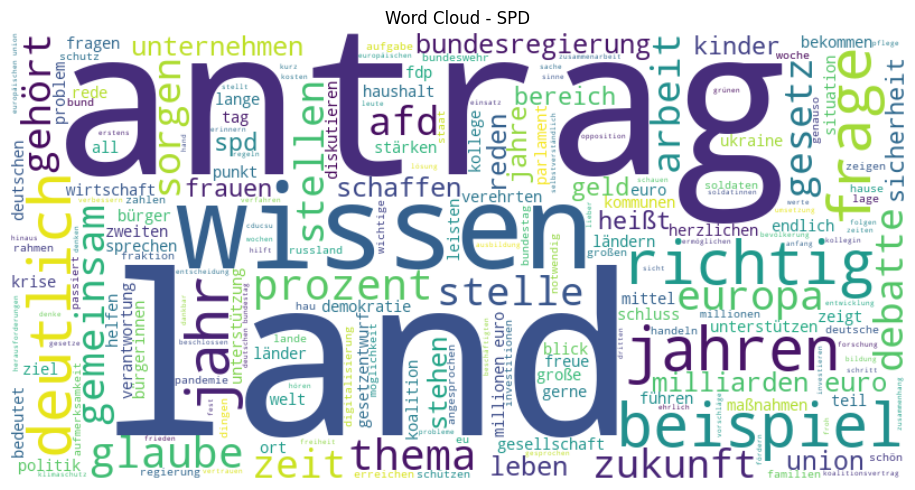

In [ ]:
# word cloud per party

# grouping words by party
party_words = data.groupby('party')['tokenized_text'].sum()

# creating seperate wordclouds per party
for party, words in party_words.items():
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=german_stopwords_full).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {party}")
    plt.tight_layout()
    plt.show()

# 18 min

### Topic Modelling

In [17]:
# Get most common agenda titles overall:

# drop NaNs
clean_titles = data["agenda_item_title"].dropna()

# count identical full topic titles
topic_counts = Counter(clean_titles)

# get top 20 most common full titles
top_20_topics = topic_counts.most_common(20)

# display
print("Top 20 full topic titles:")
for topic, count in top_20_topics:
    print(f"    {topic}: {count}")


Top 20 full topic titles:
    Auswärtiges Amt: 275
    Verteidigung: 273
    Wirtschaftliche Zusammenarbeit und Entwicklung: 262
    Abschließende Beratungen ohne Aussprache: 262
    Gesundheit: 254
    Ernährung und Landwirtschaft: 228
    Bildung und Forschung: 214
    Familie, Senioren, Frauen und Jugend: 197
    Überweisungen im vereinfachten Verfahren: 179
    Arbeit und Soziales: 171
    Digitales und Verkehr: 139
    Umwelt, Naturschutz und nukleare Sicherheit: 119
    Bundeskanzlerin und Bundeskanzleramt: 115
    Umwelt, Naturschutz, nukleare Sicherheit und Verbraucherschutz: 113
    Bundeswehreinsatz in Kosovo (KFOR): 110
    Bundeswehreinsatz in Mali (MINUSMA): 103
    Justiz und Verbraucherschutz: 102
    Verkehr und digitale Infrastruktur: 93
    Wohnen, Stadtentwicklung und Bauwesen: 92
    Bundeswehreinsatz in Südsudan (UNMISS): 88


In [18]:
# Get most common agenda titles by parties:

data_filtered = data.dropna(subset=['agenda_item_title'])
# dict to hold top topics per party
top_titles_per_party = {}

# group by party and get top 10 full agenda titles
for party, group in data_filtered.groupby('party'):
    titles = group['agenda_item_title']
    title_counter = Counter(titles)
    top_10 = title_counter.most_common(10)
    top_titles_per_party[party] = [f"{title} ({count})" for title, count in top_10]

# create df
result_df = pd.DataFrame(top_titles_per_party, index=[f"Top {i+1}" for i in range(10)])
result_df
# almost identical topics in slightly different order of importance!

AfD  \
Top 1       Abschließende Beratungen ohne Aussprache (44)   
Top 2                                Auswärtiges Amt (42)   
Top 3   Wirtschaftliche Zusammenarbeit und Entwicklung...   
Top 4                   Ernährung und Landwirtschaft (38)   
Top 5                                     Gesundheit (37)   
Top 6                                   Verteidigung (36)   
Top 7                          Bildung und Forschung (30)   
Top 8           Familie, Senioren, Frauen und Jugend (27)   
Top 9                            Arbeit und Soziales (26)   
Top 10          Bundeskanzlerin und Bundeskanzleramt (25)   

                                                  CDU/CSU  \
Top 1                                Auswärtiges Amt (75)   
Top 2                                   Verteidigung (68)   
Top 3       Abschließende Beratungen ohne Aussprache (67)   
Top 4   Wirtschaftliche Zusammenarbeit und Entwicklung...   
Top 5                                     Gesundheit (64)   
Top 6                   Ernährung und Landwirtschaft (58)   
Top 7                          Bildung und Forschung (53)   
Top 8       Überweisungen im vereinfachten Verfahren (51)   
Top 9           Familie, Senioren, Frauen und Jugend (49)   
Top 10                           Arbeit und Soziales (43)   

                                                      FDP  \
Top 1                                   Verteidigung (42)   
Top 2                                Auswärtiges Amt (35)   
Top 3   Wirtschaftliche Zusammenarbeit und Entwicklung...   
Top 4                                     Gesundheit (34)   
Top 5       Abschließende Beratungen ohne Aussprache (34)   
Top 6                          Bildung und Forschung (28)   
Top 7                   Ernährung und Landwirtschaft (28)   
Top 8           Familie, Senioren, Frauen und Jugend (26)   
Top 9       Überweisungen im vereinfachten Verfahren (25)   
Top 10                           Arbeit und Soziales (23)   

                                                    GRÜNE  \
Top 1                                Auswärtiges Amt (52)   
Top 2   Wirtschaftliche Zusammenarbeit und Entwicklung...   
Top 3                                     Gesundheit (39)   
Top 4                                   Verteidigung (36)   
Top 5                   Ernährung und Landwirtschaft (36)   
Top 6                          Bildung und Forschung (34)   
Top 7       Abschließende Beratungen ohne Aussprache (33)   
Top 8           Familie, Senioren, Frauen und Jugend (28)   
Top 9                            Arbeit und Soziales (26)   
Top 10      Überweisungen im vereinfachten Verfahren (24)   

                                                    LINKE  \
Top 1                                   Verteidigung (29)   
Top 2       Abschließende Beratungen ohne Aussprache (29)   
Top 3   Wirtschaftliche Zusammenarbeit und Entwicklung...   
Top 4                                     Gesundheit (24)   
Top 5                          Bildung und Forschung (23)   
Top 6           Familie, Senioren, Frauen und Jugend (23)   
Top 7                            Arbeit und Soziales (20)   
Top 8                                Auswärtiges Amt (19)   
Top 9                   Ernährung und Landwirtschaft (19)   
Top 10      Überweisungen im vereinfachten Verfahren (17)   

                                                      SPD  
Top 1                                   Verteidigung (62)  
Top 2                                     Gesundheit (56)  
Top 3   Wirtschaftliche Zusammenarbeit und Entwicklung...  
Top 4       Abschließende Beratungen ohne Aussprache (55)  
Top 5                                Auswärtiges Amt (52)  
Top 6                   Ernährung und Landwirtschaft (49)  
Top 7                          Bildung und Forschung (46)  
Top 8           Familie, Senioren, Frauen und Jugend (44)  
Top 9           Bundeskanzlerin und Bundeskanzleramt (38)  
Top 10      Überweisungen im vereinfachten Verfahren (37)

In [19]:
# extending stopwordlist specifically for the topic words
list_topic_stopwords = ["stunde", "aktuelle", "tätigkeitsbericht", "änderung", "vereinbarte", "debatte", "regierungserklärung", "lage", "bundesregierung", "deutsche", "zusammenarbeit", "jahre", "amt"]
german_stopwords_full.extend(list_topic_stopwords)

In [20]:
# Preparing "agenda_item_title" for topic modeling on word level

# editing the topic titles in new column: all to lower case, removing all punctuation
data["topics_edit"] = data["agenda_item_title"].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# adding column with tokenized topics
data["tokenized_topics"] = data["topics_edit"].str.split()

# get rid of empty strings
data["tokenized_topics"] = data["tokenized_topics"].apply(lambda x: x if isinstance(x, list) else [])

# getting all speeches into one shared list to investigate words
all_topics = " ".join(data["topics_edit"].dropna().astype(str))
all_topic_words = all_topics.split()


In [21]:
# topic distribution -> word counts by party of topic column 

data['full_topics'] = data['tokenized_topics'].apply(lambda tokens: [word for word in tokens if word not in german_stopwords_full and word.isalpha()])

# Flatten all tokens into a single list
all_tokens = [token for tokens in data['full_topics'] for token in tokens]

# Count word frequencies
word_counts = Counter(all_tokens)

# Get top 10 most common words
top_20 = word_counts.most_common(20)

# Display
print("Most common words in topics:")
for word, count in top_20:
    print(f"   {word}: {count}")

Most common words in topics:
   bundeswehreinsatz: 1158
   bildung: 489
   frauen: 359
   bekämpfung: 355
   forschung: 349
   landwirtschaft: 343
   entwicklung: 341
   europäischen: 335
   sicherheit: 334
   gesundheit: 319
   schutz: 311
   deutschen: 307
   wirtschaftliche: 296
   u: 290
   verteidigung: 285
   verbraucherschutz: 283
   verfahren: 283
   haushaltsgesetz: 281
   stärkung: 280
   auswärtiges: 275


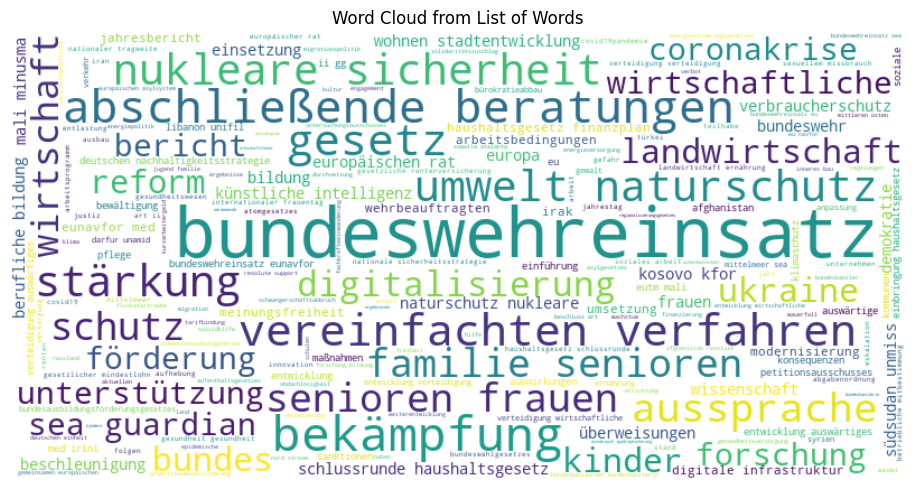

In [22]:
# visualising shared word cloud - speech segmentation

# joining all speech text into a single string
text = ' '.join(all_topic_words)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=german_stopwords_full).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.tight_layout()
plt.show()

In [23]:
# add wordcounts per party

# group by party and compute top 10 words per party
top_topics_per_party = {}

for party, group in data.groupby('party'):
    tokens = [word for tokens in group['full_topics'] for word in tokens]
    word_counter = Counter(tokens)
    top_10 = word_counter.most_common(10)
    top_topics_per_party[party] = [f"{word} ({count})" for word, count in top_10]

# create df with results to display
result_df = pd.DataFrame(top_topics_per_party, index=[f"Top {i+1}" for i in range(10)])
result_df
# -> no discrimniation by party possible! no different topics per party, interesting!


AfD                  CDU/CSU  \
Top 1   bundeswehreinsatz (147)  bundeswehreinsatz (362)   
Top 2              bildung (62)            bildung (130)   
Top 3       landwirtschaft (54)         bekämpfung (100)   
Top 4          entwicklung (52)              frauen (99)   
Top 5           bekämpfung (50)          sicherheit (90)   
Top 6               frauen (48)      landwirtschaft (89)   
Top 7            forschung (48)        europäischen (88)   
Top 8         europäischen (46)              schutz (87)   
Top 9      wirtschaftliche (46)           forschung (87)   
Top 10   verbraucherschutz (46)         entwicklung (86)   

                            FDP                    GRÜNE  \
Top 1   bundeswehreinsatz (143)  bundeswehreinsatz (147)   
Top 2              bildung (66)             bildung (66)   
Top 3               frauen (48)      landwirtschaft (53)   
Top 4         europäischen (45)           forschung (53)   
Top 5          entwicklung (45)         auswärtiges (52)   
Top 6           bekämpfung (45)         entwicklung (52)   
Top 7         verteidigung (44)              frauen (49)   
Top 8            forschung (44)          bekämpfung (49)   
Top 9       landwirtschaft (42)           deutschen (49)   
Top 10              schutz (42)                   u (48)   

                          LINKE                      SPD  
Top 1   bundeswehreinsatz (141)  bundeswehreinsatz (218)  
Top 2              bildung (54)            bildung (111)  
Top 3               frauen (39)          bekämpfung (81)  
Top 4           sicherheit (38)        europäischen (80)  
Top 5            forschung (37)           forschung (80)  
Top 6          entwicklung (36)              frauen (76)  
Top 7       landwirtschaft (32)      landwirtschaft (73)  
Top 8         europäischen (31)          sicherheit (73)  
Top 9         verteidigung (30)          gesundheit (73)  
Top 10          gesundheit (30)         entwicklung (70)

### Temporal Analysis of Speeches

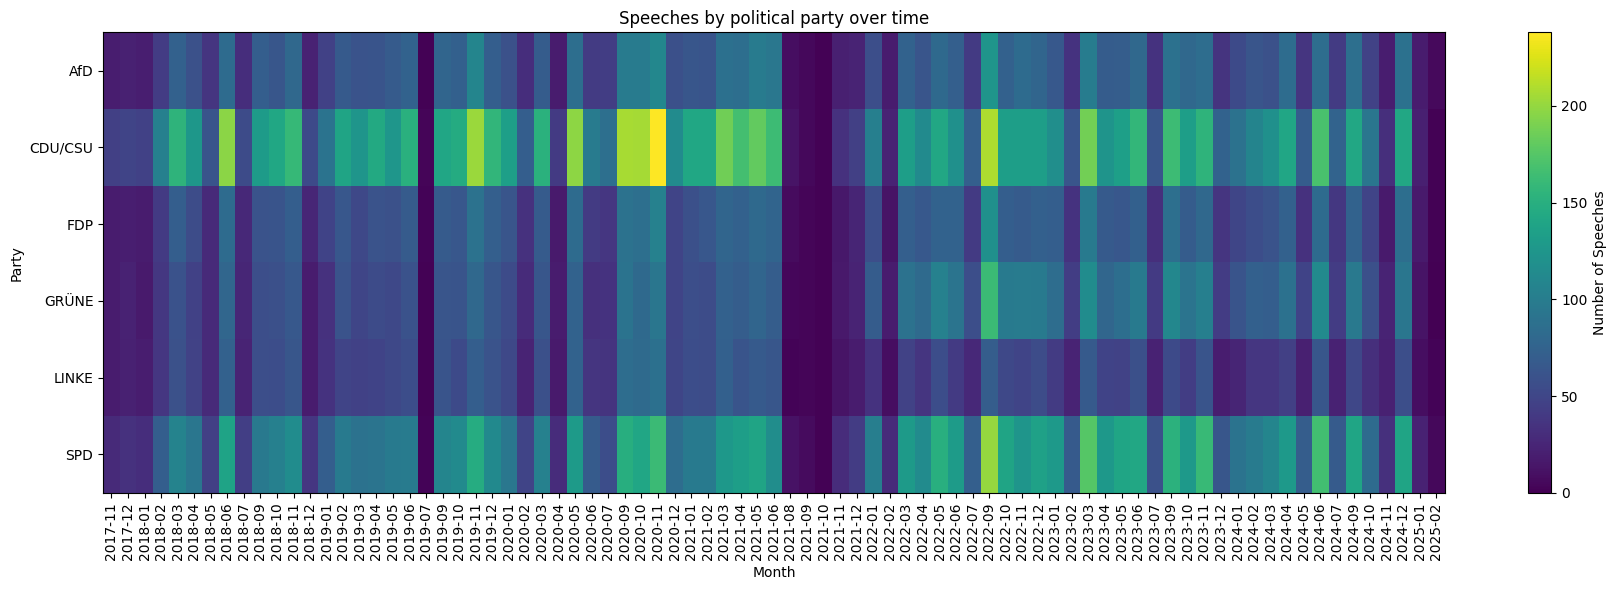

In [25]:
# more better temporal analyses, also with column that Estelle will add
# maybe get sth from Pascal

data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.to_period('M').dt.to_timestamp()
pivot = data.groupby(['month', 'party']).size().unstack(fill_value=0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(18, 6))
im = ax.imshow(pivot.T, aspect='auto')

# Korrigierte Achsenbeschriftungen für transponierte Matrix
ax.set_xticks(np.arange(len(pivot.index)))
ax.set_xticklabels(pivot.index.strftime('%Y-%m'), rotation=90)
ax.set_yticks(np.arange(len(pivot.columns)))
ax.set_yticklabels(pivot.columns)

ax.set_title("Speeches by political party over time")
ax.set_xlabel('Month')
ax.set_ylabel('Party')

# Colorbar
cbar = fig.colorbar(im, ax=ax, label='Number of Speeches')
plt.tight_layout()
plt.show()

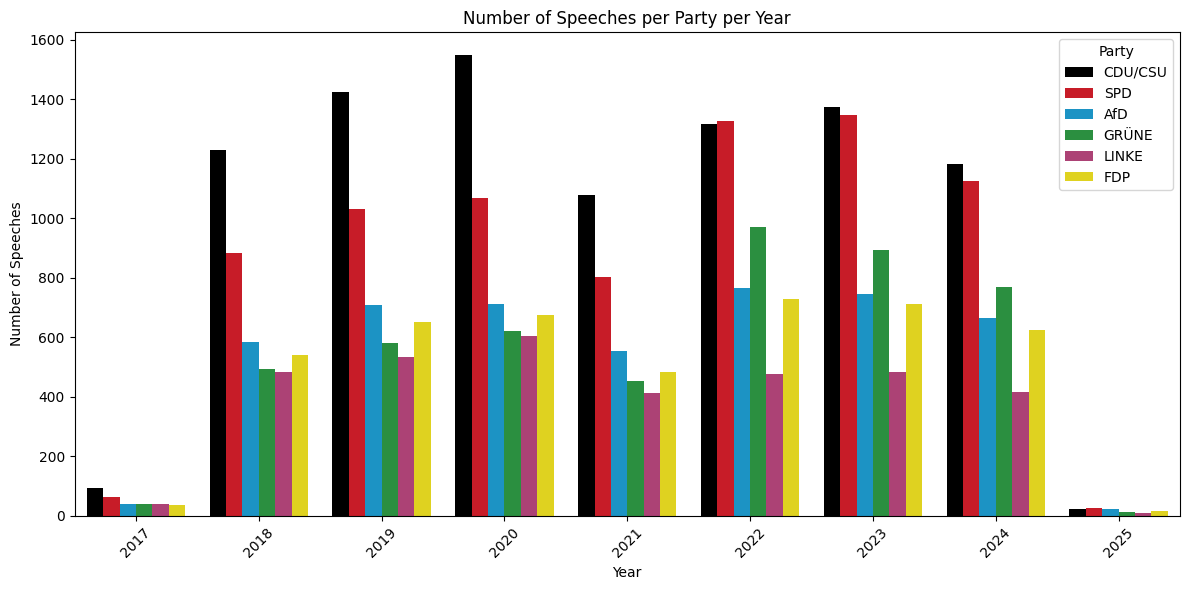

In [26]:
# Extract year from date column 
data['year'] = pd.to_datetime(data['date']).dt.year.dropna()

# Group by Year and Party, count speeches
speech_counts = data.groupby(['year', 'party'])['speech_text'].count().reset_index()
speech_counts.rename(columns={'speech_text': 'SpeechCount'}, inplace=True)
speech_counts['year'] = speech_counts['year'].astype(int)
speech_counts = speech_counts.sort_values(by=['year', 'SpeechCount'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=speech_counts, x='year', y='SpeechCount', hue='party', palette=party_colors)

plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.title('Number of Speeches per Party per Year')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


C:\Users\Estelle\AppData\Local\Temp\ipykernel_27992\3164445475.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  party_time_series = df.groupby('party').resample('M').size().unstack(0).fillna(0)


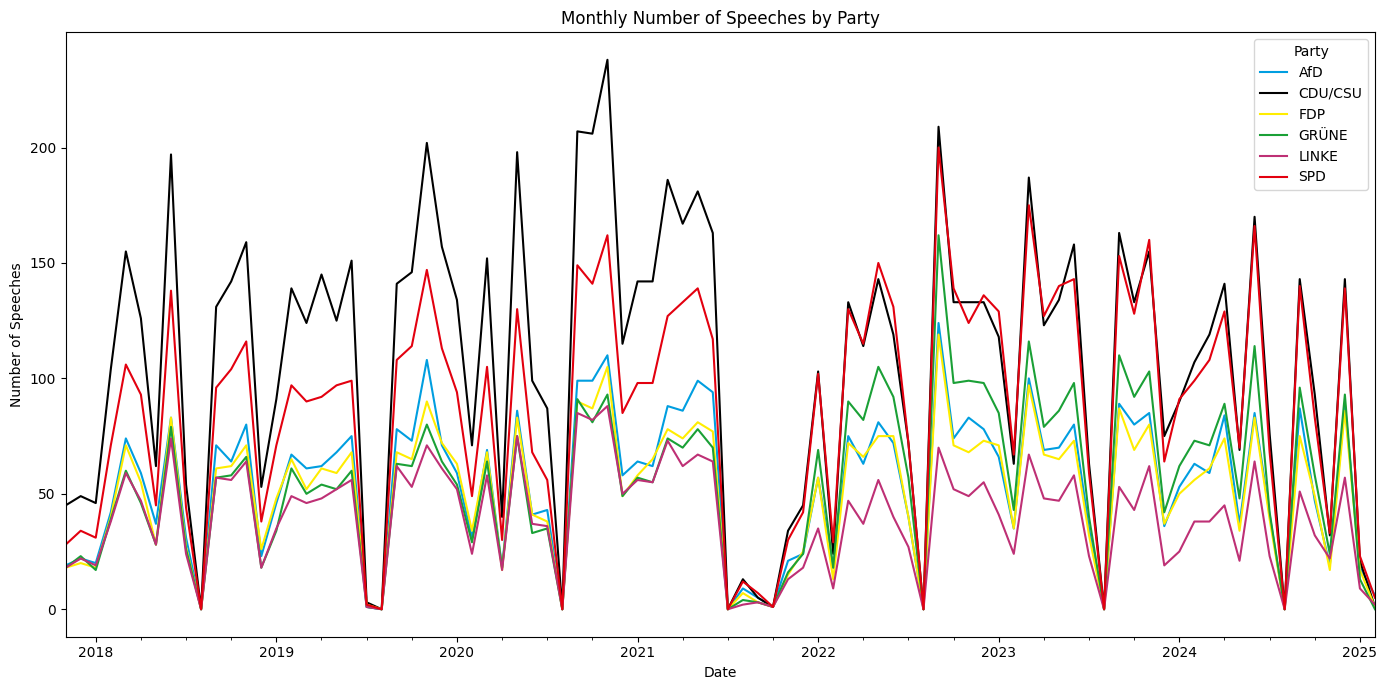

In [27]:
# visualising temporal patterns, by month, grouped by political parties

# perparations:
# setting index to Date for resampling
df = data.set_index('date')
# resampling and counting speeches per month per party
party_time_series = df.groupby('party').resample('M').size().unstack(0).fillna(0)

plt.figure(figsize=(14, 7))
party_time_series.plot(ax=plt.gca(), color=[party_colors.get(party) for party in party_time_series.columns])
plt.title("Monthly Number of Speeches by Party")
plt.xlabel("Date")
plt.ylabel("Number of Speeches")
plt.legend(title="Party")
plt.tight_layout()
plt.show()